<a href="https://colab.research.google.com/github/amaziarczyk/Projects/blob/master/Kaggle/Predict_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rozwiązanie do projektu ,,Predict Future Sales"**

sales_train.csv - zestaw treningowy. Dzienne dane historyczne od stycznia 2013 r. do października 2015 r.

test.csv - zestaw testowy. Musisz prognozować sprzedaż dla tych sklepów i produktów na listopad 2015.

sample_submission.csv - przykładowy plik przesyłania w odpowiednim formacie. przedmioty.csv - dodatkowe informacje o produktach/produktach.

item_categories.csv - dodatkowe informacje o kategoriach przedmiotów. sklepy.csv- dodatkowe informacje o sklepach.

Pola danych

ID - identyfikator reprezentujący krotkę (Sklep, Przedmiot) w zestawie testowym

shop_id - unikalny identyfikator sklepu

item_id - unikatowy identyfikator produktu

item_category_id - unikatowy identyfikator kategorii towaru

item_cnt_day - liczba sprzedanych produktów. Przewidujesz miesięczną kwotę tej miary

item_price - aktualna cena towaru

data - data w formacie dd/mm/yyyy

date_block_num - kolejny numer miesiąca, używany dla wygody. Styczeń 2013 jest 0, luty 2013 jest 1,..., październiku 2015 jest 33

item_name - nazwa przedmiotu

shop_name - nazwa sklepu

item_category_name - nazwa kategorii towaru


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Sprzedaż/competitive-data-science-predict-future-sales/sales_train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Sprzedaż/competitive-data-science-predict-future-sales/test.csv')

In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train['date']=pd.to_datetime(train['date'])

In [ ]:
train['year']=pd.DatetimeIndex(train['date']).year
train['month']=pd.DatetimeIndex(train['date']).month
train['day']=pd.DatetimeIndex(train['date']).day
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,02.01.2013,0,59,22154,999.00,1.0,2013,2,1
1,03.01.2013,0,25,2552,899.00,1.0,2013,3,1
2,05.01.2013,0,25,2552,899.00,-1.0,2013,5,1
3,06.01.2013,0,25,2554,1709.05,1.0,2013,6,1
4,15.01.2013,0,25,2555,1099.00,1.0,2013,1,15


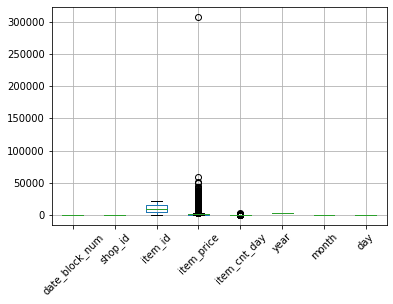

In [ ]:
boxplot =train.boxplot( rot=45)


In [ ]:
df_train=train[train['item_price']<30000]

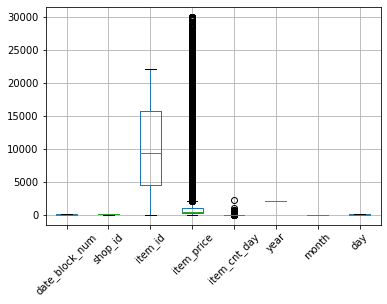

In [ ]:
boxplot_2 =df_train.boxplot( rot=45)

In [ ]:
df_train.isnull().sum().sum()

0

In [ ]:
corr=df_train.corr()

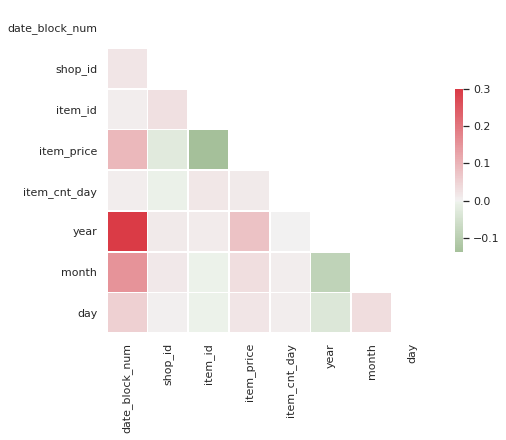

In [ ]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(120, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap,
            square=True,linewidths=.8 , cbar_kws={"shrink": .5})

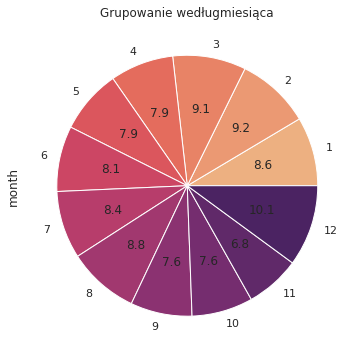

In [ ]:
group=df_train.groupby('month')['month'].agg('count')
group.plot(kind= 'pie', title='Grupowanie wedługmiesiąca', figsize=(6,6), autopct='%0.1f', cmap="flare")

In [ ]:
df_train['year'].value_counts()

2013    1267553
2014    1055853
2015     612203
Name: year, dtype: int64

In [ ]:
df_train['month'].value_counts()

12    295730
2     268734
3     266509
8     259766
1     251216
7     246337
6     238323
5     232850
4     231059
9     224023
10    222606
11    198456
Name: month, dtype: int64

In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


sales_train.csv - zestaw treningowy. Dzienne dane historyczne od stycznia 2013 r. do października 2015 r.

test.csv - zestaw testowy. Musisz prognozować sprzedaż dla tych sklepów i produktów na listopad 2015.

sample_submission.csv - przykładowy plik przesyłania w odpowiednim formacie. przedmioty.csv - dodatkowe informacje o produktach/produktach.

item_categories.csv - dodatkowe informacje o kategoriach przedmiotów. sklepy.csv- dodatkowe informacje o sklepach.

Pola danych

ID - identyfikator reprezentujący krotkę (Sklep, Przedmiot) w zestawie testowym

shop_id - unikalny identyfikator sklepu

item_id - unikatowy identyfikator produktu

item_category_id - unikatowy identyfikator kategorii towaru

item_cnt_day - liczba sprzedanych produktów. Przewidujesz miesięczną kwotę tej miary

item_price - aktualna cena towaru

data - data w formacie dd/mm/yyyy

date_block_num - kolejny numer miesiąca, używany dla wygody. Styczeń 2013 jest 0, luty 2013 jest 1,..., październiku 2015 jest 33

item_name - nazwa przedmiotu

shop_name - nazwa sklepu

item_category_name - nazwa kategorii towaru
sales_train.csv - zestaw treningowy. Dzienne dane historyczne od stycznia 2013 r. do października 2015 r.

test.csv - zestaw testowy. Musisz prognozować sprzedaż dla tych sklepów i produktów na listopad 2015.

sample_submission.csv - przykładowy plik przesyłania w odpowiednim formacie. przedmioty.csv - dodatkowe informacje o produktach/produktach.

item_categories.csv - dodatkowe informacje o kategoriach przedmiotów. sklepy.csv- dodatkowe informacje o sklepach.

Pola danych

ID - identyfikator reprezentujący krotkę (Sklep, Przedmiot) w zestawie testowym

shop_id - unikalny identyfikator sklepu

item_id - unikatowy identyfikator produktu

item_category_id - unikatowy identyfikator kategorii towaru

item_cnt_day - liczba sprzedanych produktów. Przewidujesz miesięczną kwotę tej miary

item_price - aktualna cena towaru

data - data w formacie dd/mm/yyyy

date_block_num - kolejny numer miesiąca, używany dla wygody. Styczeń 2013 jest 0, luty 2013 jest 1,..., październiku 2015 jest 33

item_name - nazwa przedmiotu

shop_name - nazwa sklepu

item_category_name - nazwa kategorii towaru
sales_train.csv - zestaw treningowy. Dzienne dane historyczne od stycznia 2013 r. do października 2015 r.

test.csv - zestaw testowy. Musisz prognozować sprzedaż dla tych sklepów i produktów na listopad 2015.

sample_submission.csv - przykładowy plik przesyłania w odpowiednim formacie. przedmioty.csv - dodatkowe informacje o produktach/produktach.

item_categories.csv - dodatkowe informacje o kategoriach przedmiotów. sklepy.csv- dodatkowe informacje o sklepach.

Pola danych

ID - identyfikator reprezentujący krotkę (Sklep, Przedmiot) w zestawie testowym

shop_id - unikalny identyfikator sklepu

item_id - unikatowy identyfikator produktu

item_category_id - unikatowy identyfikator kategorii towaru

item_cnt_day - liczba sprzedanych produktów. Przewidujesz miesięczną kwotę tej miary

item_price - aktualna cena towaru

data - data w formacie dd/mm/yyyy

date_block_num - kolejny numer miesiąca, używany dla wygody. Styczeń 2013 jest 0, luty 2013 jest 1,..., październiku 2015 jest 33

item_name - nazwa przedmiotu

shop_name - nazwa sklepu

item_category_name - nazwa kategorii towaru
hhggffffffffffffffffggggg ug8

In [ ]:
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
0,0,59,22154,999.00,1.0,2013,2,1
1,0,25,2552,899.00,1.0,2013,3,1
2,0,25,2552,899.00,-1.0,2013,5,1
3,0,25,2554,1709.05,1.0,2013,6,1
4,0,25,2555,1099.00,1.0,2013,1,15


In [ ]:
X = df_train['item_cnt_day'].values.reshape(-1,1)
y = df_train['month'].values.reshape(-1,1)

In [ ]:
df_train['index1'] = df_train.index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,index1
0,0,59,22154,999.00,1.0,2013,2,1,0
1,0,25,2552,899.00,1.0,2013,3,1,1
2,0,25,2552,899.00,-1.0,2013,5,1,2
3,0,25,2554,1709.05,1.0,2013,6,1,3
4,0,25,2555,1099.00,1.0,2013,1,15,4


In [ ]:
df_train.rename(columns = {"index1": "ID"},  
          inplace = True) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,ID
0,0,59,22154,999.00,1.0,2013,2,1,0
1,0,25,2552,899.00,1.0,2013,3,1,1
2,0,25,2552,899.00,-1.0,2013,5,1,2
3,0,25,2554,1709.05,1.0,2013,6,1,3
4,0,25,2555,1099.00,1.0,2013,1,15,4


In [ ]:
data=df_train.copy()
target=data.pop("item_id")
data.head(3)

,date_block_num,shop_id,item_price,item_cnt_day,year,month,day,ID
0,0,59,999.0,1.0,2013,2,1,0
1,0,25,899.0,1.0,2013,3,1,1
2,0,25,899.0,-1.0,2013,5,1,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(data, target, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (2201706, 8)
y_train shape (2201706,)
X_test shape (733903, 8)
y_test shape (733903,)

Test ratio: 0.25

y_train:
20949    23457
5822      7101
17717     6784
2808      5630
4181      5091
         ...  
14701        1
7666         1
5619         1
21304        1
0            1
Name: item_id, Length: 21137, dtype: int64

y_test:
20949    7883
5822     2307
17717    2283
2808     1849
4181     1762
         ... 
7554        1
19612       1
15913       1
6870        1
16190       1
Name: item_id, Length: 18620, dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

R2 score: 0.0200
